<a href="https://colab.research.google.com/github/kamalatul123/UTS-PCD/blob/main/UTS_PCD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NO. 1

/tmp/ipython-input-2580530279.py:13: RuntimeWarning: overflow encountered in scalar add
  c = 255 / np.log(1 + np.max(img))
/tmp/ipython-input-2580530279.py:13: RuntimeWarning: divide by zero encountered in log
  c = 255 / np.log(1 + np.max(img))
/tmp/ipython-input-2580530279.py:14: RuntimeWarning: divide by zero encountered in log
  log_img = c * np.log(1 + img)
/tmp/ipython-input-2580530279.py:14: RuntimeWarning: invalid value encountered in multiply
  log_img = c * np.log(1 + img)
/tmp/ipython-input-2580530279.py:15: RuntimeWarning: invalid value encountered in cast
  log_img = np.array(log_img, dtype=np.uint8)


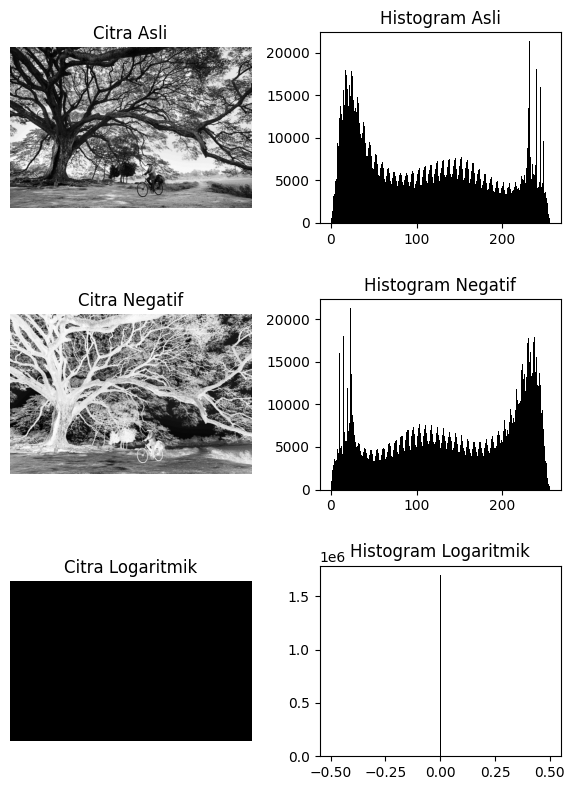

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('uts.jpg', cv2.IMREAD_GRAYSCALE)
if img is None:
    raise FileNotFoundError("File tidak ditemukan. Pastikan path-nya benar.")

# 2. Transformasi negatif
negatif = 255 - img

# 3. Transformasi logaritmik
c = 255 / np.log(1 + np.max(img))
log_img = c * np.log(1 + img)
log_img = np.array(log_img, dtype=np.uint8)

# 4. Tampilkan citra dan histogram
plt.figure(figsize=(12, 8))

# citra asli
plt.subplot(3, 4, 1)
plt.imshow(img, cmap='gray')
plt.title('Citra Asli')
plt.axis('off')

plt.subplot(3, 4, 2)
plt.hist(img.ravel(), bins=256, color='black')
plt.title('Histogram Asli')

# negatif
plt.subplot(3, 4, 5)
plt.imshow(negatif, cmap='gray')
plt.title('Citra Negatif')
plt.axis('off')

plt.subplot(3, 4, 6)
plt.hist(negatif.ravel(), bins=256, color='black')
plt.title('Histogram Negatif')

# logaritmik
plt.subplot(3, 4, 9)
plt.imshow(log_img, cmap='gray')
plt.title('Citra Logaritmik')
plt.axis('off')

plt.subplot(3, 4, 10)
plt.hist(log_img.ravel(), bins=256, color='black')
plt.title('Histogram Logaritmik')

plt.tight_layout()
plt.show()


NO. 2

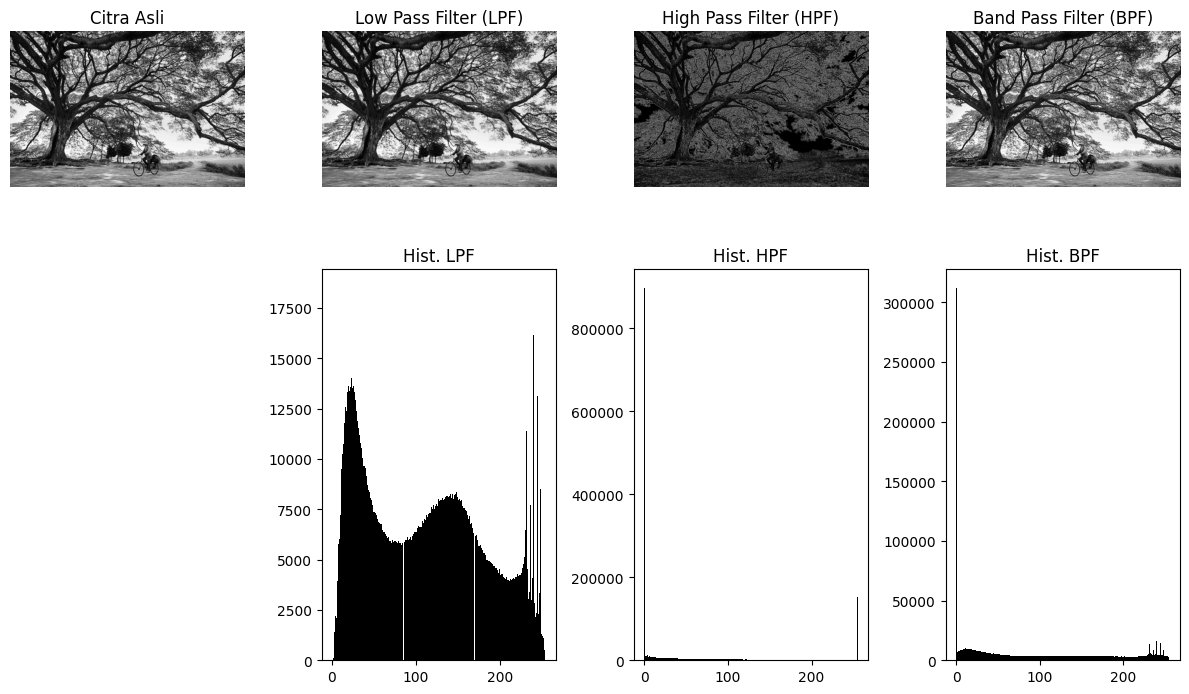

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Baca citra grayscale
img = cv2.imread('uts.jpg', cv2.IMREAD_GRAYSCALE)

if img is None:
    raise FileNotFoundError("File tidak ditemukan")

# ==============================
# a. Low Pass Filter (LPF)
# ==============================
kernel_lpf = (1/9) * np.array([[1,1,1],
                               [1,1,1],
                               [1,1,1]])
img_lpf = cv2.filter2D(img, -1, kernel_lpf)

# ==============================
# b. High Pass Filter (HPF)
# ==============================
kernel_hpf = np.array([[-1,-1,-1],
                       [-1, 8,-1],
                       [-1,-1,-1]])
img_hpf = cv2.filter2D(img, -1, kernel_hpf)

# ==============================
# c. Band Pass Filter (BPF)
# ==============================
kernel_bpf = np.array([[ 0,-1, 0],
                       [-1, 5,-1],
                       [ 0,-1, 0]])
img_bpf = cv2.filter2D(img, -1, kernel_bpf)

# ==============================
# Tampilkan hasil
# ==============================
plt.figure(figsize=(12,8))

plt.subplot(2,4,1)
plt.imshow(img, cmap='gray')
plt.title('Citra Asli')
plt.axis('off')

plt.subplot(2,4,2)
plt.imshow(img_lpf, cmap='gray')
plt.title('Low Pass Filter (LPF)')
plt.axis('off')

plt.subplot(2,4,3)
plt.imshow(img_hpf, cmap='gray')
plt.title('High Pass Filter (HPF)')
plt.axis('off')

plt.subplot(2,4,4)
plt.imshow(img_bpf, cmap='gray')
plt.title('Band Pass Filter (BPF)')
plt.axis('off')

plt.subplot(2,4,6)
plt.hist(img_lpf.ravel(), bins=256, color='black')
plt.title('Hist. LPF')

plt.subplot(2,4,7)
plt.hist(img_hpf.ravel(), bins=256, color='black')
plt.title('Hist. HPF')

plt.subplot(2,4,8)
plt.hist(img_bpf.ravel(), bins=256, color='black')
plt.title('Hist. BPF')

plt.tight_layout()
plt.show()

